# Multiple Linear Regression
More than two variables
#### Input variables also called as :
* Features
* input Data 
* Independent Variables

In [24]:
# Import Libraries 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
# Import data sets 
df = pd.read_csv('../Pandas\DataSets/50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
# step 3 

X = df[['R&D Spend','Administration','Marketing Spend']]
Y= df[['Profit']]
print(X.head())
Y.head()

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42


,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [7]:
# Step 4 Create and fit your model

model = LinearRegression().fit(X,Y)
model


LinearRegression()

In [8]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [9]:
model.intercept_

array([50122.19298987])

In [11]:
model.predict([[165349.20,136897.80,471784.10]])

c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[192521.25289008]])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Profit
Feature names seen at fit time, yet now missing:
- Administration
- Marketing Spend
- R&D Spend


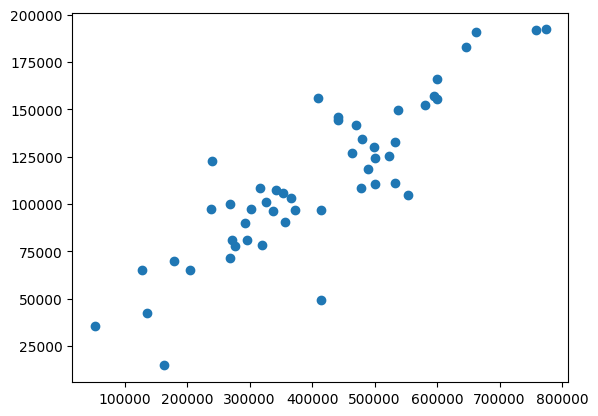

In [19]:
# Libraries
# For Training 
import matplotlib.pyplot as plt
plt.scatter(X['R&D Spend'] + X['Administration']+ X['Marketing Spend'],Y)
plt.plot(Y,model.predict(Y),color="Green")
plt.ylabel("Profit")
plt.xlabel("Amount Spended")
plt.title("Training Plot")
plt.show()

In [20]:
model.score(X,Y)

0.9507459940683246

In [25]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        20:09:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X,  color='k', label='Regression model')
ax.scatter(X, Y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
# ax.set_title('$R^2= %.2f$', fontsize=18)

fig.tight_layout()